In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from make_rankings import *

In [2]:
#Get Freestyle and TA rankings from 'speedrun_data.csv'

freestyle,ta = make_rankings('speedrun_data.csv')

In [3]:
#Prepare figure properties for later graphs
figure_size = (16,7)
font_size = 20

Text(0.5, 1.0, 'Average clear time by Monster - TA')

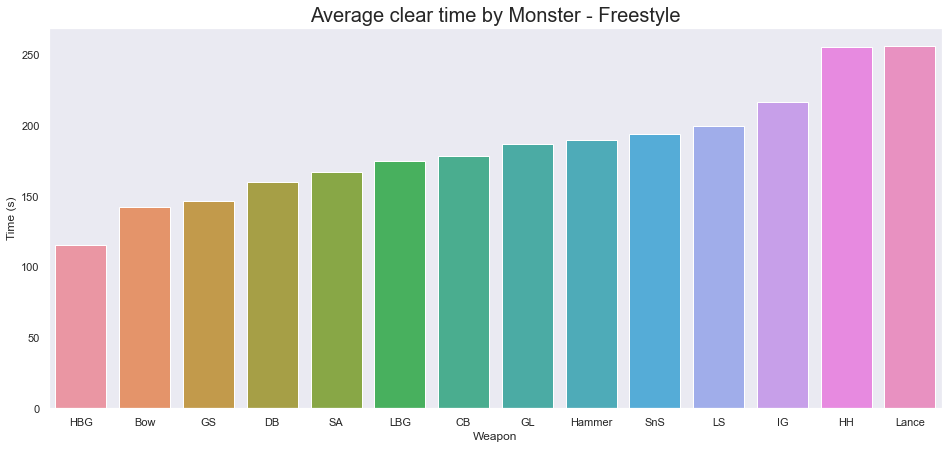

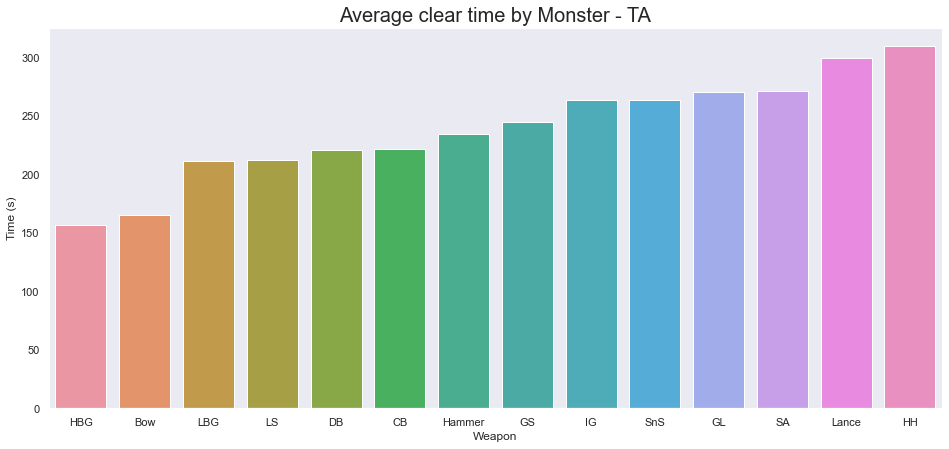

In [4]:
#Very early analysis: just get average TOP clear time by weapons/monsters

avg_freestyle = average_top_runs(freestyle,'Monster/Weapon')
avg_ta = average_top_runs(ta,'Monster/Weapon')

#Plot average freestyle times
sns.set_context('notebook')
sns.set_style('dark')

plt.figure(figsize=figure_size)
sns.barplot(x='Weapon',y='Time (s)',data=avg_freestyle).set_title('Average clear time by Monster - Freestyle',fontsize=font_size)

#Plot average TA times
plt.figure(figsize=figure_size)
sns.barplot(x='Weapon',y='Time (s)',data=avg_ta).set_title('Average clear time by Monster - TA',fontsize=font_size)

Text(0.5, 1.0, 'Average clear time by Quest - TA Rules')

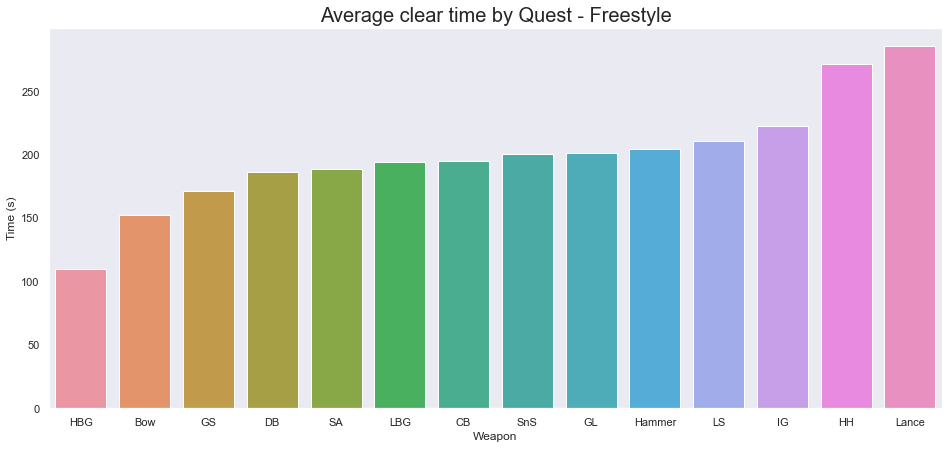

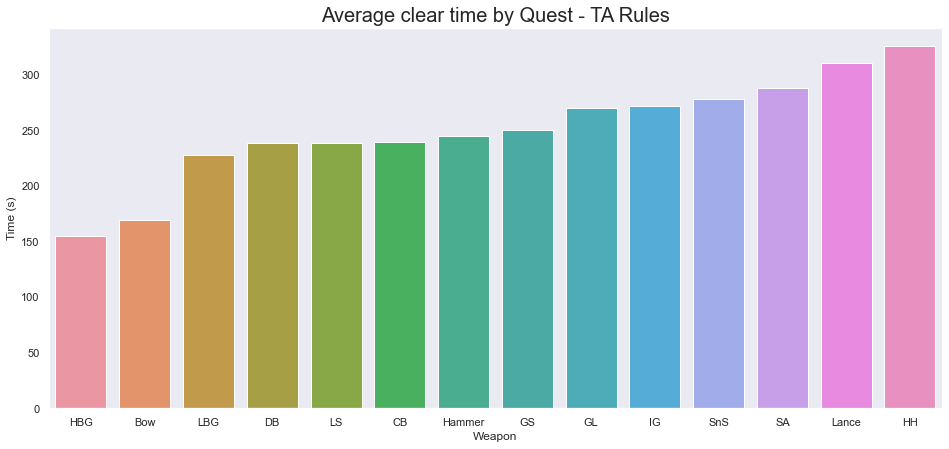

In [5]:
#Same analysis, but considering top times by weapon/QUEST

avg_freestyle = average_top_runs(freestyle,'Quest/Weapon')
avg_ta = average_top_runs(ta,'Quest/Weapon')

plt.figure(figsize=figure_size)
sns.barplot(x='Weapon',y='Time (s)',data=avg_freestyle).set_title('Average clear time by Quest - Freestyle',fontsize=font_size)

plt.figure(figsize=figure_size)
sns.barplot(x='Weapon',y='Time (s)',data=avg_ta).set_title('Average clear time by Quest - TA Rules',fontsize=font_size)

Text(0.5, 1.0, 'Average TOP clear time by Monster - TA')

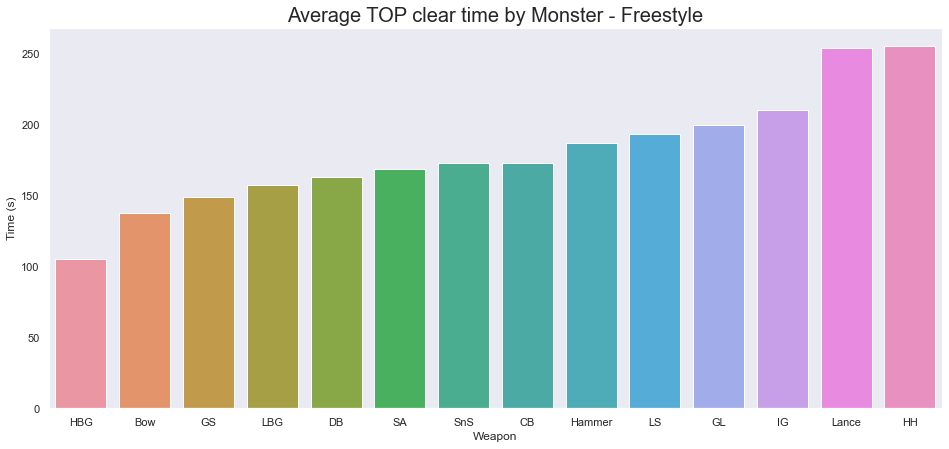

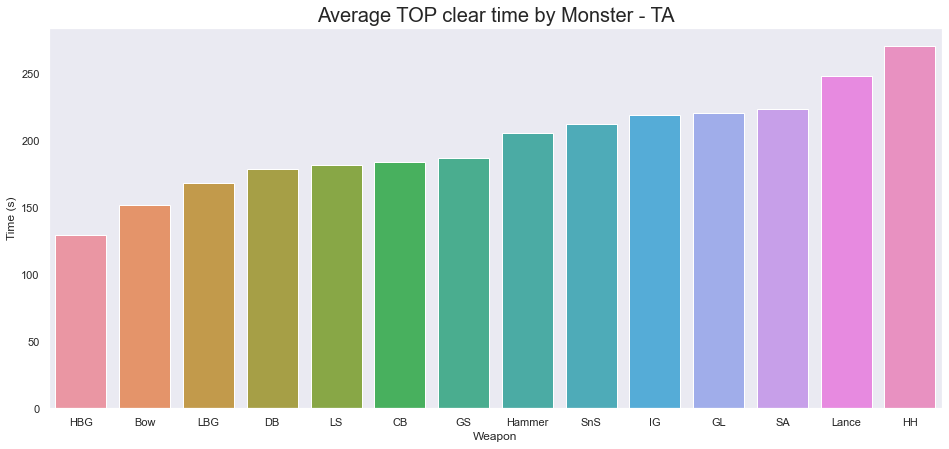

In [6]:
#Second analysis: filter only the top runs and see the average times

fs_all_weapons = filter_by_weapon(freestyle)
ta_all_weapons = filter_by_weapon(ta)

#Get average times
fs_aw_avg = average_top_runs(fs_all_weapons,'Monster/Weapon')
ta_aw_avg = average_top_runs(ta_all_weapons,'Monster/Weapon')

plt.figure(figsize=figure_size)
sns.barplot(x='Weapon',y='Time (s)',data=fs_aw_avg).set_title('Average TOP clear time by Monster - Freestyle', fontsize =font_size)

plt.figure(figsize=figure_size)
sns.barplot(x='Weapon',y='Time (s)',data=ta_aw_avg).set_title('Average TOP clear time by Monster - TA', fontsize =font_size)

In [7]:
#Create 'Weapon (long)' column to have long form weapon names
#First, get the inverse weapon_dict to go from short names to long names
inv_weapon_dict = {value: key for key, value in weapon_dict.items()}

#Apply mapping from inv_weapon-dict
fs_aw_avg['Weapon (long)']=fs_aw_avg['Weapon'].apply(lambda x: inv_weapon_dict[x])
ta_aw_avg['Weapon (long)']=ta_aw_avg['Weapon'].apply(lambda x: inv_weapon_dict[x])

#Numerical values
print('Freestyle average top clear times per weapon (1 entry per monster)')
print(fs_aw_avg[['Weapon (long)','Time (s)']])
print('\nTA Rules average top clear times per weapon (1 entry per monster)')
print(ta_aw_avg[['Weapon (long)','Time (s)']])

Freestyle average top clear times per weapon (1 entry per monster)
       Weapon (long)    Time (s)
1       Heavy Bowgun  105.443214
2                Bow  137.725135
3        Great Sword  148.884167
4       Light Bowgun  157.265405
5        Dual Blades  162.871081
6         Switch Axe  168.458421
7   Sword And Shield  172.388947
8       Charge Blade  172.935143
9             Hammer  186.887568
10        Long Sword  192.945676
11          Gunlance  199.154474
12     Insect Glaive  210.090278
13             Lance  253.522162
14      Hunting Horn  255.170270

TA Rules average top clear times per weapon (1 entry per monster)
       Weapon (long)    Time (s)
1       Heavy Bowgun  129.406500
2                Bow  151.838889
3       Light Bowgun  168.427500
4        Dual Blades  178.607368
5         Long Sword  182.306111
6       Charge Blade  183.874737
7        Great Sword  187.211500
8             Hammer  205.728000
9   Sword And Shield  212.514500
10     Insect Glaive  219.021667
11      

Text(0.5, 1.0, 'Average TOP clear time by Monster - TA')

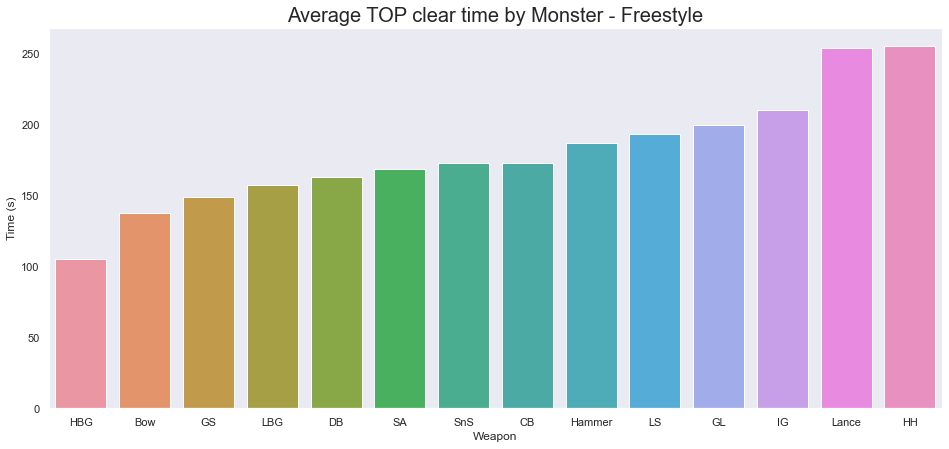

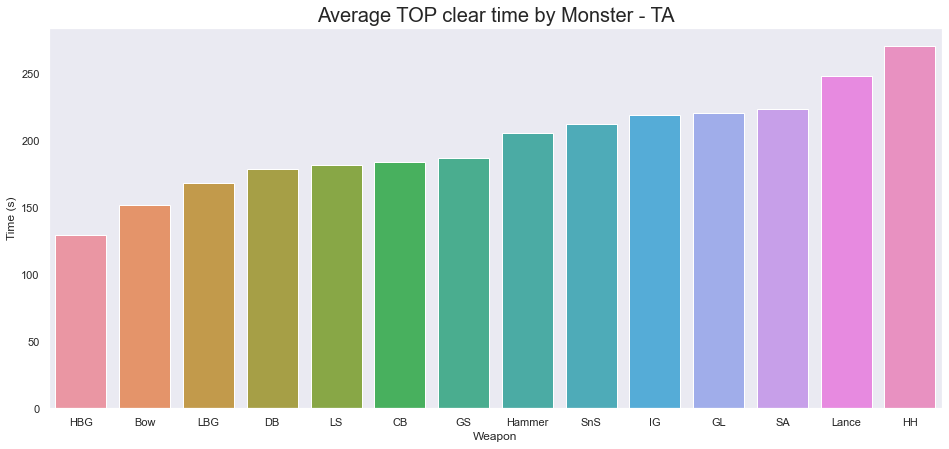

In [8]:
#Now repeat second analysis, but separate entries by Quest rather than Monster

fs_all_weapons = filter_by_weapon(freestyle)
ta_all_weapons = filter_by_weapon(ta)

fs_aw_avg_q = average_top_runs(fs_all_weapons,'Quest/Weapon')
ta_aw_avg_q = average_top_runs(ta_all_weapons,'Quest/Weapon')

plt.figure(figsize=figure_size)
sns.barplot(x='Weapon',y='Time (s)',data=fs_aw_avg).set_title('Average TOP clear time by Monster - Freestyle', fontsize =font_size)

plt.figure(figsize=figure_size)
sns.barplot(x='Weapon',y='Time (s)',data=ta_aw_avg).set_title('Average TOP clear time by Monster - TA', fontsize =font_size)

In [9]:
#Create 'Weapon (long)' column to have long form weapon names
#First, get the inverse weapon_dict to go from short names to long names
inv_weapon_dict = {value: key for key, value in weapon_dict.items()}

#Apply mapping from inv_weapon-dict
fs_aw_avg_q['Weapon (long)']=fs_aw_avg_q['Weapon'].apply(lambda x: inv_weapon_dict[x])
ta_aw_avg_q['Weapon (long)']=ta_aw_avg_q['Weapon'].apply(lambda x: inv_weapon_dict[x])

#Numerical values
print('Freestyle average top clear times per weapon (1 entry per Quest)')
print(fs_aw_avg_q[['Weapon (long)','Time (s)']])
print('\nTA Rules average top clear times per weapon (1 entry per Quest)')
print(ta_aw_avg_q[['Weapon (long)','Time (s)']])

Freestyle average top clear times per weapon (1 entry per Quest)
       Weapon (long)    Time (s)
1       Heavy Bowgun   99.539286
2                Bow  141.807381
3        Great Sword  156.738571
4       Light Bowgun  166.750000
5        Dual Blades  170.102619
6   Sword And Shield  175.025714
7         Switch Axe  175.233095
8       Charge Blade  178.549048
9         Long Sword  198.297143
10            Hammer  199.120714
11          Gunlance  204.365238
12     Insect Glaive  216.127143
13             Lance  265.942381
14      Hunting Horn  266.893095

TA Rules average top clear times per weapon (1 entry per Quest)
       Weapon (long)  Time (s)
1       Heavy Bowgun  129.4065
2                Bow  148.5565
3       Light Bowgun  168.4275
4        Dual Blades  179.0000
5         Long Sword  184.4060
6        Great Sword  187.2115
7       Charge Blade  187.2985
8             Hammer  205.7280
9   Sword And Shield  212.5145
10     Insect Glaive  218.7100
11        Switch Axe  220.3500
12 

In [10]:
#Get a maximum time gap, used to fit tiers later

#First, function to calculate the gap between slowest and fastest time in a ranking datafram

#Now get the maximum time_delta
time_gap = max(time_delta(ta_aw_avg),time_delta(fs_aw_avg),time_delta(ta_aw_avg_q),time_delta(fs_aw_avg_q))

#Separate into N tiers
N = 5
tier_gap = round(time_gap/5,-1) #tier_gap s per tier

In [25]:
from string import ascii_uppercase


# def make_tiers(rank_df,n_tiers=5,tier_list=[],weapon_column='Weapon',time_column='Time (s)',sort=False):
#     """
#     Separates weapons from a ranking, given by 'rank_df' into tiers, sorted by the 'time_column'.
#     Weapons will be split into 'n_tiers' tiers. Weapon list is obtained from weapon_column.
#     """

#     #Sort rank_df by time_column if desired
#     if sort:
#         rank_df = rank_df.sort_values(time_column,ascending=True)

tier_list=[]
rank_df=fs_aw_avg_q
time_column='Time (s)'
weapon_column='Weapon'

#If tier list is empty, create it from ascii_uppercase, with S as the first possible rank
if not tier_list:
    tier_list = 'S'+ascii_uppercase

#Time gap between fastest and slowest time
time_gap = rank_df[time_column].max() - rank_df[time_column].min()

#And the time gap between each individual tier
tier_gap = round(time_gap/5,-1)

#First tier will be made so the fastest time sits in the middle of it
time_list = [round(rank_df[time_column].iloc[0] - tier_gap/2,1)]

#Create rest of time tiers
while (time_list[-1] + tier_gap < rank_df[time_column].max()):
    time_list.append(time_list[-1] + tier_gap)
